# 把dPL模型中其他变量打印出来

## 导入依赖

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from datetime import datetime, timedelta

load_dotenv()
sys.path.append(os.getenv("PROJ_PATH"))  # type: ignore

from project.better_estimate import load_config  # noqa

## 设置模型配置

In [3]:
config = load_config(r"conf/config_dhbv_hopev2.yaml")
out_path = config["out_path"]

## 加载数据

In [4]:
inner_evap1 = np.load(r"E:\PaperCode\dpl-project\generic_deltamodel\project\better_estimate\output\camels_531\train1980-1995\no_multi\HopeMlpV1_E100_R365_B100_H256_256_n16_noLn_noWU_42\Hbv_2\NseBatchLoss\3dyn\test1995-2010_Ep100\SWE.npy", allow_pickle=True)
inner_evap2 = np.load(r"E:\PaperCode\dpl-project\generic_deltamodel\project\better_estimate\output\camels_531\train1980-1995\no_multi\LstmMlpModel_E100_R365_B100_H256_256_n16_noLn_noWU_42\Hbv_2\NseBatchLoss\3dyn\test1995-2010_Ep100\SWE.npy", allow_pickle=True)

## 将数据转换为月尺度

In [5]:
start_date = datetime(1995,10,1) + timedelta(days=365)
date_range = pd.date_range(start=start_date, periods=inner_evap1.shape[0], freq='D')
out_df = pd.DataFrame({
    'time': date_range,
    'inner_evap1': inner_evap1[:,1,:].flatten(),
    'inner_evap2': inner_evap2[:,1,:].flatten()
})
out_df.set_index('time', inplace=True)
out_df = out_df.resample('ME').mean()

## 加载ERA5L的数据

In [ ]:
era5l_data_path = os.path.join(os.getenv("DATA_PATH"), "era5l_data", "output_sd_mm_2000-2010_monthly.csv")
era5l_df = pd.read_csv(era5l_data_path, parse_dates=['time'], index_col='time')

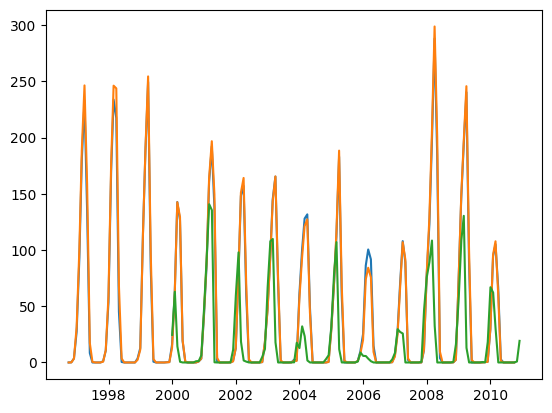

In [9]:
plt.plot(out_df.index, out_df['inner_evap1'], label='Inner Evap 1')
plt.plot(out_df.index, out_df['inner_evap2'], label='Inner Evap 2')
plt.plot(era5l_df.index, era5l_df['1022500'], label='ERA5L Evaporation')